In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# drop the 'CustomerID' and 'Gender' columns as they are not relevant for clustering
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


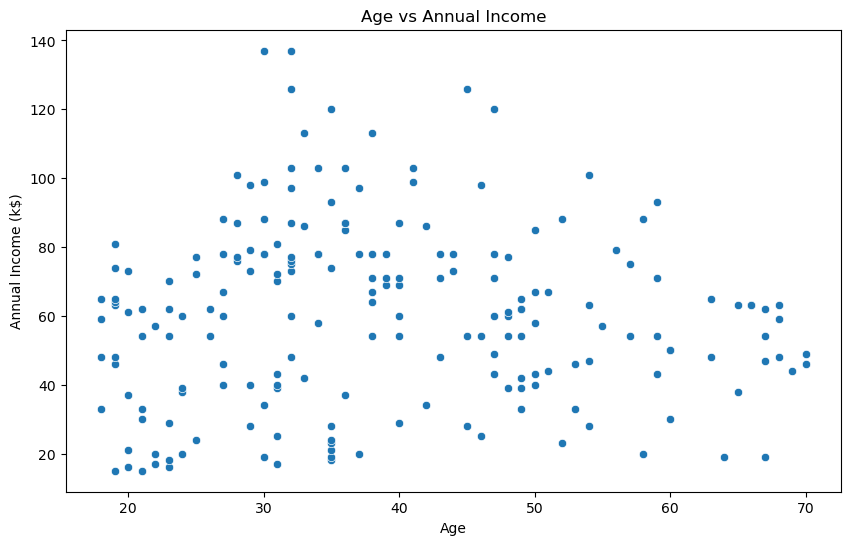

In [8]:
# display age and annual income scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

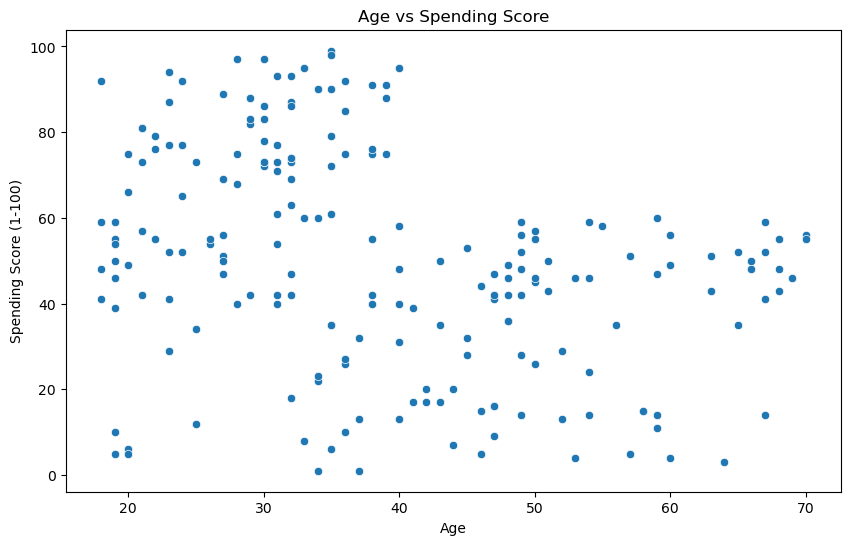

In [9]:
# display age and spending score scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [10]:
# display skewness name normal, right skewed, left skewed

def skewness_name(skewness):
    if skewness > 0:
        return 'Right Skewed'
    elif skewness < 0:
        return 'Left Skewed'
    else:
        return 'Normal'
print('Skewness of Age:', skewness_name(df['Age'].skew()))
print('Skewness of Annual Income:', skewness_name(df['Annual Income (k$)'].skew()))
print('Skewness of Spending Score:', skewness_name(df['Spending Score (1-100)'].skew()))


Skewness of Age: Right Skewed
Skewness of Annual Income: Right Skewed
Skewness of Spending Score: Left Skewed


In [11]:
# scalling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [13]:
# train kmeans clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()


c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

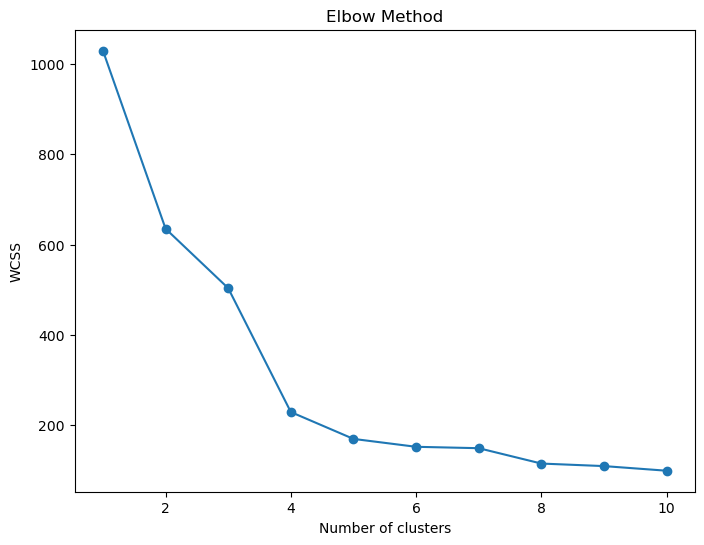

In [17]:
# check with ELBOW method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

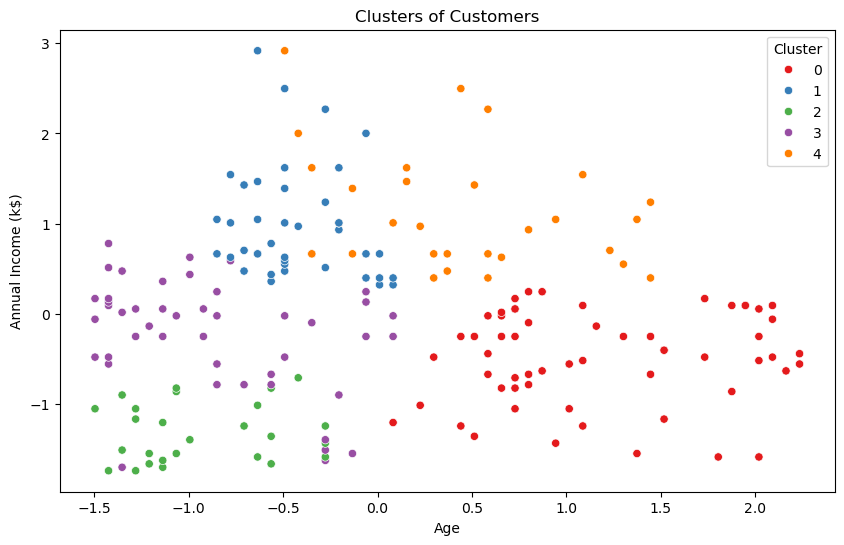

In [19]:
# display clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

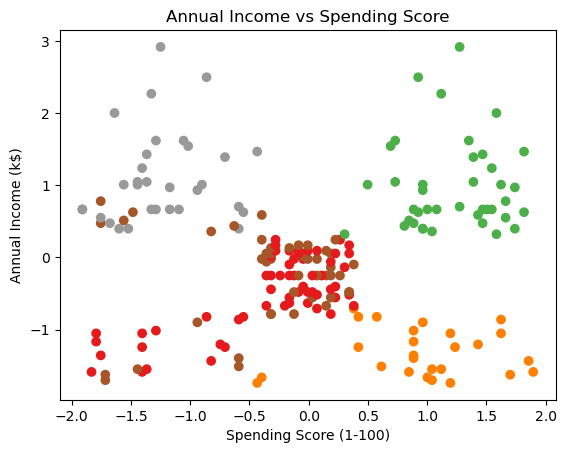

In [22]:
# display Annual Income and Spending Score scatter plot
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"], c=df["Cluster"], cmap='Set1')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [23]:
# save the file
df.to_csv("clustered_customers.csv", index=False)

In [26]:
# train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Cluster', axis=1)
y = df['Cluster']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Accuracy of Decision Tree Classifier:', accuracy_score(y_test, y_pred))


Accuracy of Decision Tree Classifier: 0.95


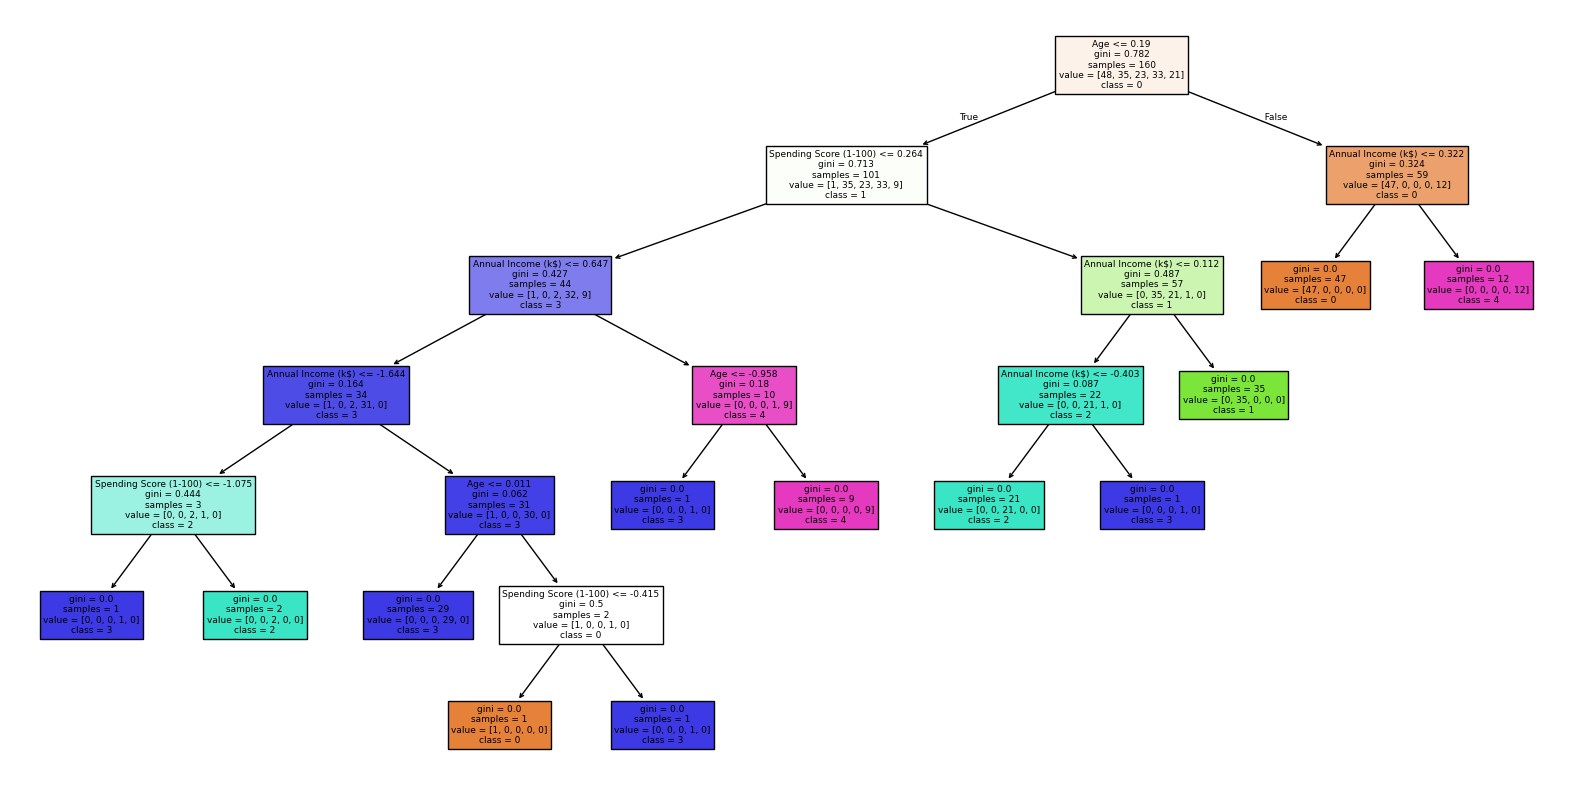

In [30]:
# graph the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=[str(i) for i in dtc.classes_])
plt.show()